In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import  show, figure
from pathlib import Path
import sys

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

# Import the module
from utils.data_loader import DataLoader
from utils.dslabs_functions import plot_bar_chart

dataloader = DataLoader()
# data, target = dataloader.get_security_classification_dataset_and_target()
data, target = dataloader.get_econmical_classification_dataset_and_target()


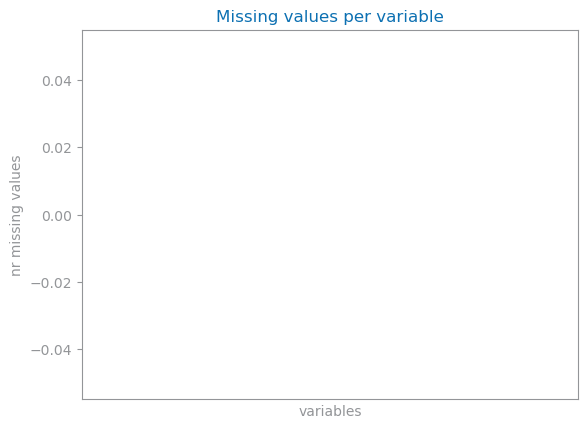

In [2]:
mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

### No missing values. Lets look at the other dataset

## Clasification handling missing values
Find the missing values and handle them

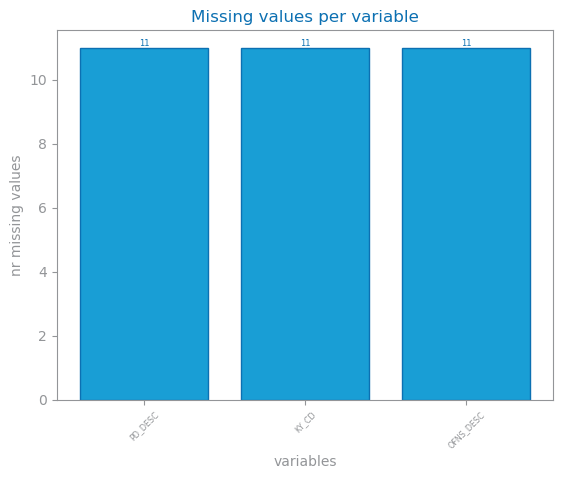

In [3]:
data, target = dataloader.get_security_classification_dataset_and_target()
mv: dict[str, int] = {}
figure()
for var in data:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
show()

## since there are so few missing values, we can drop them. Besides, it would be hard to impute the missing values in this case.



In [4]:
# print the rows with missing values
missing_data = data[data.isnull().any(axis=1)]
missing_rows_lenght = len(missing_data)
total_rows = len(data)

percentage_missing = (missing_rows_lenght / total_rows) * 100

print(f"Percentage of rows with missing values: {percentage_missing:.2f}%")

Percentage of rows with missing values: 0.22%
